# Importing all libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

# Loading Dataset

In [2]:
iris_data = datasets.load_iris()

In [3]:
iris = pd.DataFrame(iris_data.data)

In [4]:
print("features ",iris_data.feature_names) 

features  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Shape of dataset

In [6]:
iris.shape

(150, 4)

# Check the missing value

In [7]:
iris.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

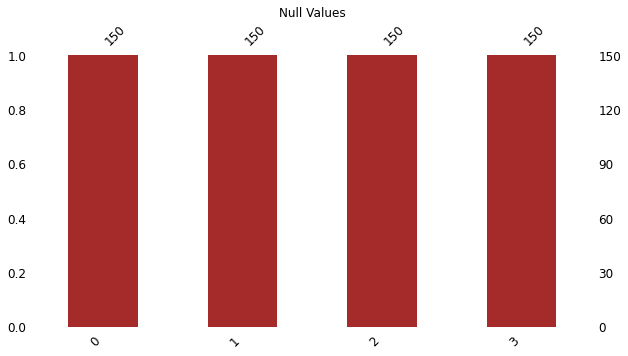

In [8]:
import missingno as no
no.bar(iris,figsize=(10,5), fontsize=12,color='brown')
plt.title("Null Values")
plt.show()

# Full summary of the dataframe

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Statistical details of the dataset

In [10]:
iris.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Find the dtypes in the Dataset

In [11]:
iris.dtypes

0    float64
1    float64
2    float64
3    float64
dtype: object

# Finding all the column names inside the dataset

In [12]:
iris.columns

RangeIndex(start=0, stop=4, step=1)

# Function return Series with number of distinct observations over requested axis

In [13]:
iris.nunique()

0    35
1    23
2    43
3    22
dtype: int64

# Find the correlation of dataset

In [14]:
iris.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


# Find the covariance of dataset

In [15]:
iris.cov()

,0,1,2,3
0,0.685694,-0.042434,1.274315,0.516271
1,-0.042434,0.189979,-0.329656,-0.121639
2,1.274315,-0.329656,3.116278,1.295609
3,0.516271,-0.121639,1.295609,0.581006


# Find the Series containing counts of unique values

In [16]:
iris.value_counts()

0    1    2    3  
5.8  2.7  5.1  1.9    2
6.2  2.2  4.5  1.5    1
     2.9  4.3  1.3    1
     3.4  5.4  2.3    1
6.3  2.3  4.4  1.3    1
                     ..
5.4  3.9  1.3  0.4    1
          1.7  0.4    1
5.5  2.3  4.0  1.3    1
     2.4  3.7  1.0    1
7.9  3.8  6.4  2.0    1
Length: 149, dtype: int64

# Preparing the data

In [17]:
x = iris.values[:,0:4]
y = iris_data.target

In [18]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Splitting Data into Test and Train

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=3)

In [25]:
clf = DecisionTreeClassifier()

In [26]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [27]:
#prediction
x = [[6.4,1.7,6.6,2.2]]
y_predi = clf.predict(x)
print(y_predi)

y_pred = clf.predict(xtest)

[2]


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("Accuracy = ",accuracy_score(ytest,y_pred))

Accuracy =  0.9777777777777777


# Confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm = confusion_matrix(ytest,y_pred)

In [32]:
cm

array([[17,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 14]], dtype=int64)

In [33]:
from sklearn import tree

[Text(133.92000000000002, 199.32, 'X[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [33, 36, 36]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [0, 36, 36]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.145\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(100.44000000000001, 90.6, 'X[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 54.359999999999985, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.840000000000

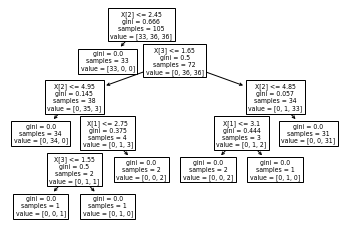

In [34]:
tree.plot_tree(clf)

In [35]:
text_represent = tree.export_text(clf)

In [36]:
print(text_represent)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [53]:
plt.savefig('tree.png',format='png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [54]:
tree.export_graphviz(clf)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= 0.8\\ngini = 0.666\\nsamples = 105\\nvalue = [33, 36, 36]"] ;\n1 [label="gini = 0.0\\nsamples = 33\\nvalue = [33, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[2] <= 4.75\\ngini = 0.5\\nsamples = 72\\nvalue = [0, 36, 36]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[3] <= 1.65\\ngini = 0.057\\nsamples = 34\\nvalue = [0, 33, 1]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 33\\nvalue = [0, 33, 0]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n3 -> 5 ;\n6 [label="X[3] <= 1.7\\ngini = 0.145\\nsamples = 38\\nvalue = [0, 3, 35]"] ;\n2 -> 6 ;\n7 [label="X[2] <= 4.95\\ngini = 0.48\\nsamples = 5\\nvalue = [0, 2, 3]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]"] ;\n7 -> 8 ;\n9 [label="X[1] <= 2.75\\ngini = 0.375\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n7 -> 9 ;\n10 [label="X[2] <= 5.05\\ngini = 0.5\\nsamples = 2\\

# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [37]:
from sklearn.metrics import r2_score, mean_squared_error
print("Accuracy is: ", r2_score(ytest,y_pred))

Accuracy is:  0.9675324675324676


In [38]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(ytest, y_pred)) 

Mean Absolute Error: 0.022222222222222223


In [39]:
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred)) 

Mean Squared Error: 0.022222222222222223
